<b>note from Brian:</b>

as far as I can tell by initial inspection-powers are not very destructive, which is very good

Plot (k, p@k) and (k, wp@k) curves for each power

if the weighted and unweighted curves converge for large k, it suggests that the weighting penalizes only high-bias examples. Then we can pick a proper value for p, fix the target metric (AUC, perhaps) and then tune hyperparameters on the next run

In [21]:
%pylab inline
%autosave 25

import pandas as pd
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


Autosaving every 25 seconds


In [32]:
data = 'p_at_k_data/target_metric.csv'
df = pd.read_csv(data)
df.head()

,p,k,sum_of_weights^p,p@k,weighted_p@k
0,1,1,0.858978,1.000000,1.000000
1,1,11,7.486839,1.000000,1.000000
2,1,21,15.367306,0.952381,0.939505
3,1,31,23.035321,0.935484,0.920885
4,1,41,30.499883,0.902439,0.885134


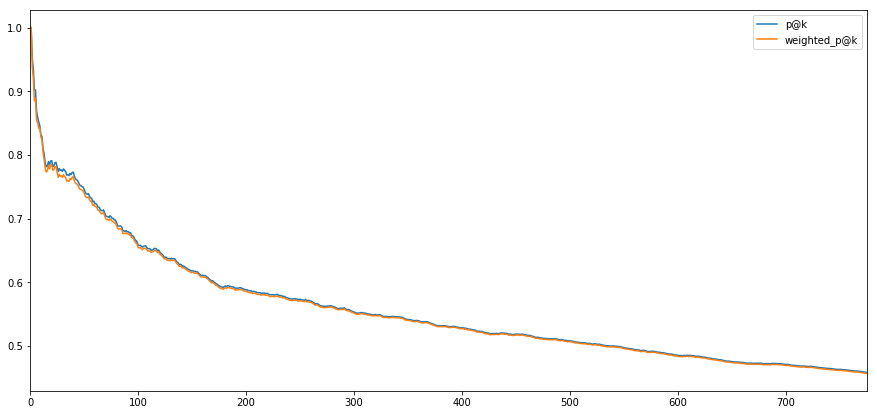

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
_ = df[df['p']==1][['p@k', 'weighted_p@k']].plot(ax=ax)

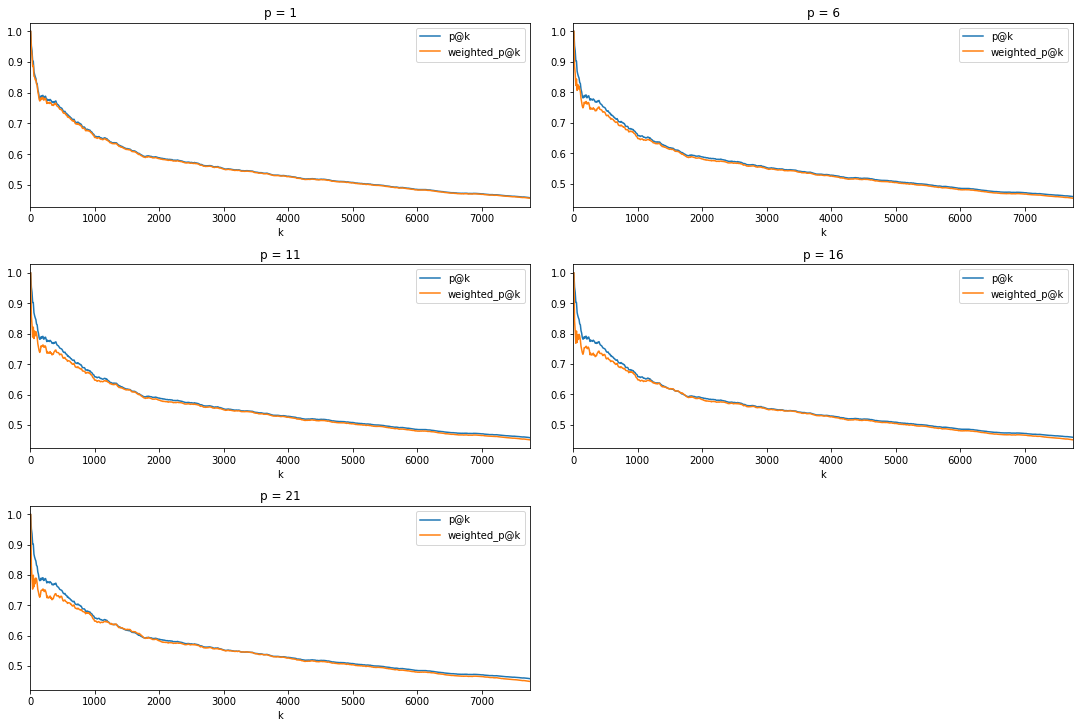

In [119]:
fig, axs = plt.subplots(3, 2, figsize=(15,10), constrained_layout=True)

for i, p in enumerate(df['p'].unique()):
    ax = axs[int(i/2), i%2]
    ax.set_title('p = {}'.format(p))
    df[df['p']==p][['k', 'p@k', 'weighted_p@k']].plot(x='k', ax=ax)

_ = axs[-1, -1].axis('off')

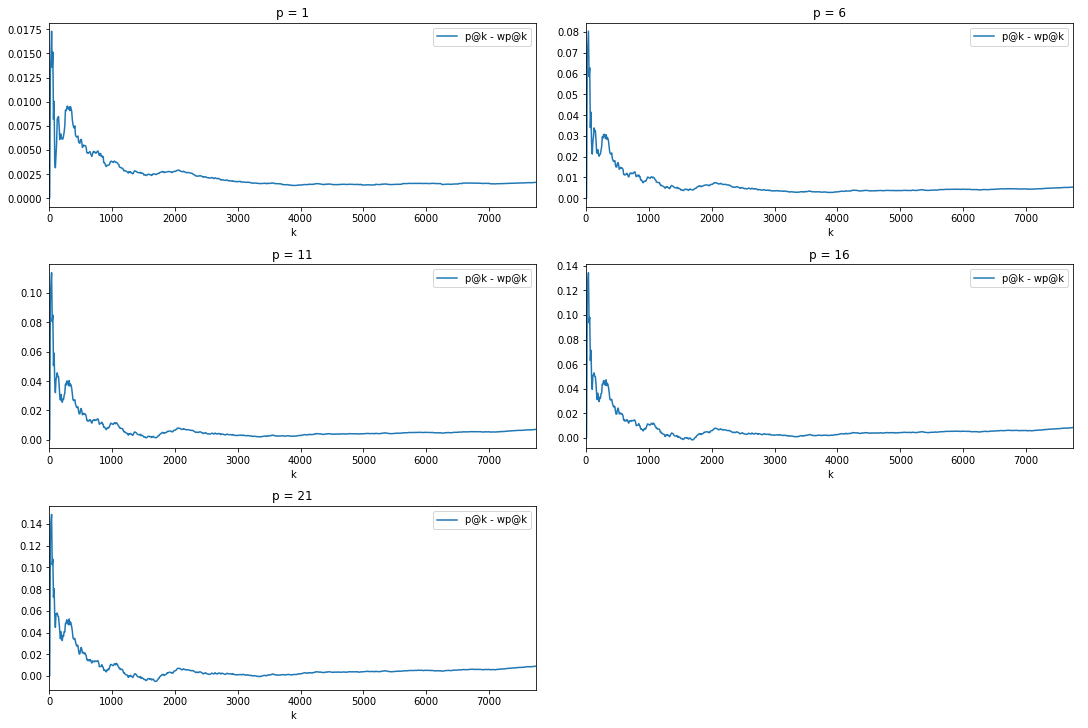

In [120]:
fig, axs = plt.subplots(3, 2, figsize=(15,10), constrained_layout=True)

df['p@k - wp@k'] = df['p@k'] - df['weighted_p@k']

for i, p in enumerate(df['p'].unique()):
    ax = axs[int(i/2), i%2]
    ax.set_title('p = {}'.format(p))
    df[df['p']==p][['k', 'p@k - wp@k']].plot(x='k', ax=ax)

_ = axs[-1, -1].axis('off')

### Plot LDA metric product across binary and contiuous, pid and cid data

cid_v5_LDA_continuous.csv and pid_v5_LDA_continuous.csv are generated by the LDA routine in this [notebook](https://github.com/BrianDavisMath/FDA-COVID19/blob/greg/dimension-reduction/notebooks/K-L%20Divergence%20and%20GMM.ipynb). 

In [3]:
data = 'LDA_metrics/cid_v5_LDA_continuous.csv'
df_cont_cid = pd.read_csv(data)
df_cont_cid.head()

,cid,pid,latent_prob_delta_ratio,latent_prob_neg,latent_prob_pos,latent_prob_delta
0,938,AAB59829,0.999317,0.955786,0.956439,0.000653
1,938,P9WFX0,0.999317,0.955786,0.956439,0.000653
2,938,P09622,0.999317,0.955786,0.956439,0.000653
3,938,P50591,0.999317,0.955786,0.956439,0.000653
4,938,Q8TDS4,0.999317,0.955786,0.956439,0.000653


In [4]:
data = 'LDA_metrics/pid_v5_LDA_continuous.csv'
df_cont_pid = pd.read_csv(data)
df_cont_pid.head()

,cid,pid,latent_prob_delta_ratio,latent_prob_neg,latent_prob_pos,latent_prob_delta
0,938,AAB59829,0.996154,0.803432,0.800348,0.003084
1,1986,AAB59829,0.996154,0.803432,0.800348,0.003084
2,37542,AAB59829,0.996154,0.803432,0.800348,0.003084
3,445580,AAB59829,0.996154,0.803432,0.800348,0.003084
4,4100,AAB59829,0.996154,0.803432,0.800348,0.003084


In [5]:
data = '../data/validation_interactions_v5.csv'
df = pd.read_csv(data)
df.head()

,Unnamed: 0,cid,pid,activity,cid_binary_weights,pid_binary_weights
0,0,938,AAB59829,1,0.952894,0.996703
1,1,1986,AAB59829,1,0.975912,0.996703
2,2,37542,AAB59829,0,0.963498,0.996703
3,3,445580,AAB59829,0,0.973330,0.996703
4,4,4100,AAB59829,0,0.923492,0.996703


In [6]:
df_cont_cid['cid_latent_prob_delta_ratio'] = df_cont_cid['latent_prob_delta_ratio']
df_cont_pid['pid_latent_prob_delta_ratio'] = df_cont_pid['latent_prob_delta_ratio']

In [7]:
merged_df = pd.merge(df_cont_cid, df_cont_pid,  how='inner', on=['cid','pid'])

In [8]:
merged_df.head()

,cid,pid,latent_prob_delta_ratio_x,latent_prob_neg_x,latent_prob_pos_x,latent_prob_delta_x,cid_latent_prob_delta_ratio,latent_prob_delta_ratio_y,latent_prob_neg_y,latent_prob_pos_y,latent_prob_delta_y,pid_latent_prob_delta_ratio
0,938,AAB59829,0.999317,0.955786,0.956439,0.000653,0.999317,0.996154,0.803432,0.800348,0.003084,0.996154
1,938,P9WFX0,0.999317,0.955786,0.956439,0.000653,0.999317,0.995031,0.530269,0.527641,0.002629,0.995031
2,938,P09622,0.999317,0.955786,0.956439,0.000653,0.999317,0.997549,0.476798,0.475631,0.001167,0.997549
3,938,P50591,0.999317,0.955786,0.956439,0.000653,0.999317,0.995514,0.424504,0.422604,0.001900,0.995514
4,938,Q8TDS4,0.999317,0.955786,0.956439,0.000653,0.999317,0.996288,0.682657,0.680127,0.002529,0.996288


In [9]:
merged_df = pd.merge(merged_df, df,  how='inner', on=['cid','pid'])

In [10]:
len(merged_df)

8024

In [11]:
merged_df.head()

,cid,pid,latent_prob_delta_ratio_x,latent_prob_neg_x,latent_prob_pos_x,latent_prob_delta_x,cid_latent_prob_delta_ratio,latent_prob_delta_ratio_y,latent_prob_neg_y,latent_prob_pos_y,latent_prob_delta_y,pid_latent_prob_delta_ratio,Unnamed: 0,activity,cid_binary_weights,pid_binary_weights
0,938,AAB59829,0.999317,0.955786,0.956439,0.000653,0.999317,0.996154,0.803432,0.800348,0.003084,0.996154,0,1,0.952894,0.996703
1,938,P9WFX0,0.999317,0.955786,0.956439,0.000653,0.999317,0.995031,0.530269,0.527641,0.002629,0.995031,70,1,0.952894,0.996648
2,938,P09622,0.999317,0.955786,0.956439,0.000653,0.999317,0.997549,0.476798,0.475631,0.001167,0.997549,130,1,0.952894,0.989984
3,938,P50591,0.999317,0.955786,0.956439,0.000653,0.999317,0.995514,0.424504,0.422604,0.001900,0.995514,137,1,0.952894,0.999389
4,938,Q8TDS4,0.999317,0.955786,0.956439,0.000653,0.999317,0.996288,0.682657,0.680127,0.002529,0.996288,148,1,0.952894,0.991207


In [12]:
merged_df['target'] = \
    merged_df['cid_latent_prob_delta_ratio']* \
    merged_df['pid_latent_prob_delta_ratio']* \
    merged_df['cid_binary_weights']* \
    merged_df['pid_binary_weights']

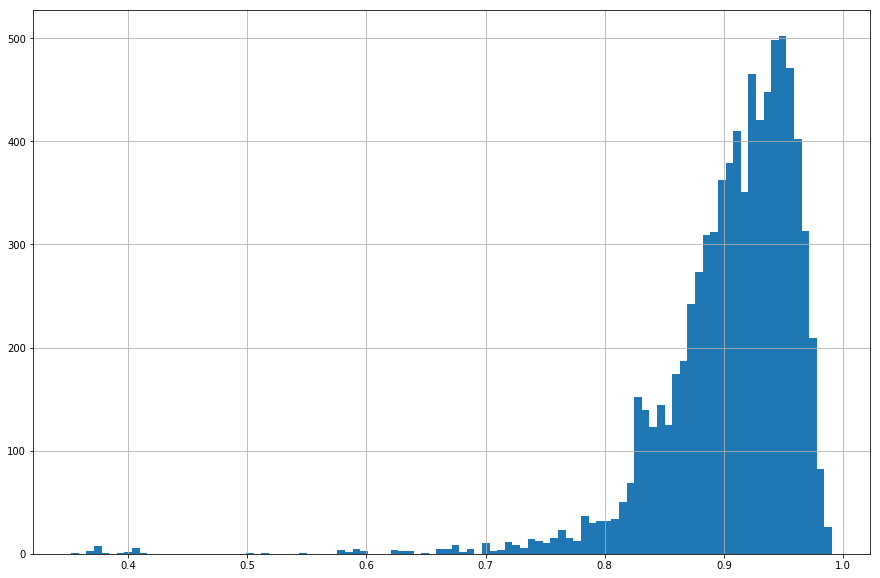

In [12]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
_ = merged_df['target'].hist(bins=100)

### Fit KDE

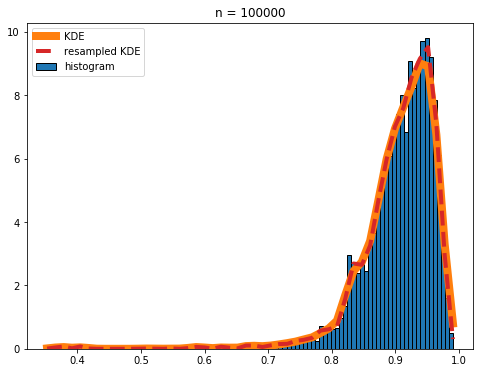

In [13]:
import scipy.stats as sts

n = 100000
samples = merged_df['target']

# generate some random multimodal histogram data
h,e = np.histogram(samples, bins=100, density=True)
x = np.linspace(e.min(), e.max())

# plot the histogram
plt.figure(figsize=(8,6))
plt.bar(e[:-1], h, width=np.diff(e), ec='k', align='edge', label='histogram')

# plot the real KDE
kde = sts.gaussian_kde(samples)
plt.plot(x, kde.pdf(x), c='C1', lw=8, label='KDE')

# resample the histogram and find the KDE.
resamples = np.random.choice((e[:-1] + e[1:])/2, size=n*5, p=h/h.sum())
rkde = sts.gaussian_kde(resamples)

# plot the KDE
plt.plot(x, rkde.pdf(x), '--', c='C3', lw=4, label='resampled KDE')
plt.title('n = %d' % n)
plt.legend()
plt.show()

### Fit Gamma distribution

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


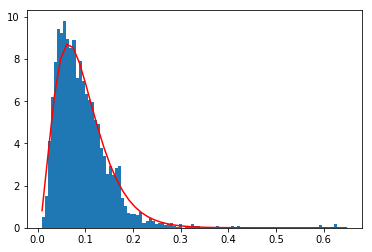

In [22]:
gamma = stats.gamma
y = 1-merged_df['target']

h,e = np.histogram(y, bins=100, density=True)
x = np.linspace(e.min(), e.max())
# fit
param = gamma.fit(y, floc=0.0)
pdf_fitted = gamma.pdf(x, *param)
plt.plot(x, pdf_fitted, color='r')

# plot the histogram
plt.hist(y, normed=True, bins=100)

_ = plt.show()

In [15]:
param

(3.2081715776676396, 0.0, 0.029356905842396603)

### Generate new Gamma distribution by tweaking the fitted Gamma parameters.

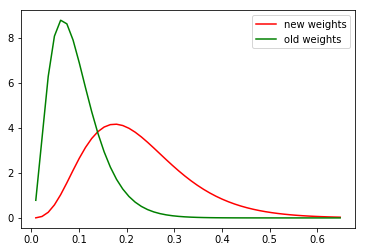

In [16]:
import matplotlib.pyplot as plt
import scipy.special as sps

params = (4.5, 0.0, 0.05)

h,e = np.histogram(y, bins=100, density=True)
x = np.linspace(e.min(), e.max())

pdf_new = gamma.pdf(x, *params)

plt.plot(x, pdf_new, color='r', label='new weights')
plt.plot(x, pdf_fitted, color='g', label='old weights')
plt.legend()

plt.show()

In [17]:
gamma.ppf(q=0.9999, a=params[0], loc=params[1], scale=params[2])

0.8429987109741227

In [18]:
gamma.cdf(x=0.8429987109741227, a=params[0], loc=params[1], scale=params[2])

0.9999

### Generate new weights from the new Gamma distribution and compare to p@k

Instead of using power to spread out the distribution of the LDA ratio weights, we'll use the gammma.ppf() of the normalised weight rank as the new weight for p@k.

In [31]:
df_probabilities = pd.read_csv('p_at_k_data/probabilities.csv')

In [32]:
df_probabilities.head()

,used_dim_red_weights,cid,pid,activity,cid_only_predict_proba,pid_only_predict_proba,combined_predict_proba,latent_prob_delta_ratio
0,False,938,AAB59829,1,0.707202,0.208146,0.934761,0.952894
1,False,938,P9WFX0,1,0.707202,0.642418,0.877649,0.952894
2,False,938,P09622,1,0.707202,0.514818,0.922373,0.952894
3,False,938,P50591,1,0.707202,0.427687,0.899164,0.952894
4,False,938,Q8TDS4,1,0.707202,0.083850,0.918245,0.952894


In [16]:
def calculate_weights(df_probabilities):
    start_k = 1
    end_k = len(df_probabilities)
    k_inc = 10

    results = []
    
    df_probabilities.sort_values(by='combined_predict_proba', ascending=False, inplace=True)

    df_probabilities['weight_rank'] = df_probabilities['latent_prob_delta_ratio'].rank()
    df_probabilities['weight_rank'] = df_probabilities['weight_rank']/df_probabilities['weight_rank'].max()

    # Avoid having the max normalized rank = 1 since the gamma ppf will return inf for that. 
    df_probabilities['weight_rank'] = df_probabilities['weight_rank'] - df_probabilities['weight_rank'].min()
    
    params = (4.5, 0.0, 0.05)
    df_probabilities['weight_rank'] = gamma.ppf(df_probabilities['weight_rank'], a=params[0], loc=params[1], scale=params[2])

    for k in range(start_k, end_k, k_inc):
        v = df_probabilities[:k][(df_probabilities['activity'] == 1.0)]
        sum_of_weights_p = v['weight_rank'].sum()
        p_at_k = v['activity'].sum()/k
        weighted_p_at_k = sum_of_weights_p/df_probabilities[:k]['weight_rank'].sum()
        result = [k, sum_of_weights_p, p_at_k, weighted_p_at_k]
        results.append(result)
        
    df_results = pd.DataFrame(results, columns=['k', 'sum_of_weights_p', 'p@k', 'weighted_p@k'])
    return df_results

In [107]:
df_results = calculate_weights(df_probabilities)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [108]:
df_probabilities['weight_rank'].max()

0.7032696143502336

In [109]:
df_results.head()

,k,sum_of_weights_p,p@k,weighted_p@k
0,1,0.073067,1.000000,1.000000
1,11,0.713813,1.000000,1.000000
2,21,2.094728,0.952381,0.857056
3,31,3.331690,0.935484,0.826634
4,41,4.988020,0.902439,0.781149


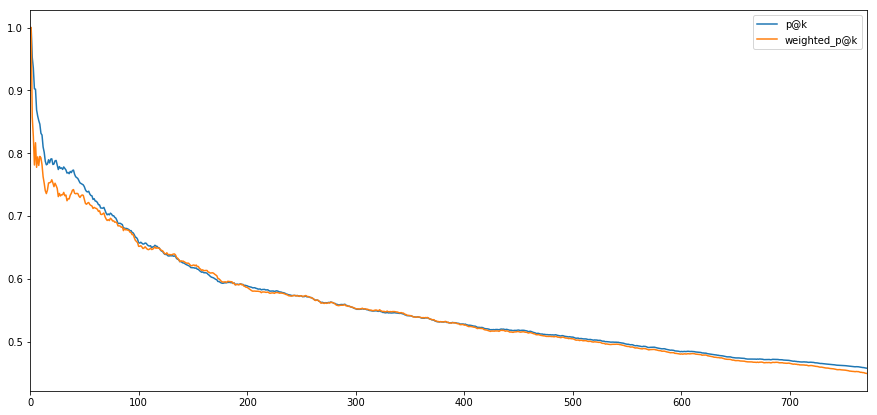

In [110]:
fig, ax = plt.subplots(figsize=(15,7))
_ = df_results[['p@k', 'weighted_p@k']].plot(ax=ax)

In [13]:
# Now test p@k and weighted p@k over the product of the four LDA weights (binary and continuous over pid and cid)

df_probabilities = pd.read_csv('p_at_k_data/probabilities.csv').drop_duplicates(['cid', 'pid'])

merged_df.drop_duplicates(['cid', 'pid'], inplace=True)
df_validation = pd.merge(df_probabilities, merged_df.drop(['activity'], axis=1), how='inner', on=['cid','pid'])

print(len(df_validation))
df_validation.head()

7720


,used_dim_red_weights,cid,pid,activity,cid_only_predict_proba,pid_only_predict_proba,combined_predict_proba,latent_prob_delta_ratio,latent_prob_delta_ratio_x,latent_prob_neg_x,...,cid_latent_prob_delta_ratio,latent_prob_delta_ratio_y,latent_prob_neg_y,latent_prob_pos_y,latent_prob_delta_y,pid_latent_prob_delta_ratio,Unnamed: 0,cid_binary_weights,pid_binary_weights,target
0,False,938,AAB59829,1,0.707202,0.208146,0.934761,0.952894,0.999317,0.955786,...,0.999317,0.996154,0.803432,0.800348,0.003084,0.996154,0,0.952894,0.996703,0.945454
1,False,938,P9WFX0,1,0.707202,0.642418,0.877649,0.952894,0.999317,0.955786,...,0.999317,0.995031,0.530269,0.527641,0.002629,0.995031,70,0.952894,0.996648,0.944335
2,False,938,P09622,1,0.707202,0.514818,0.922373,0.952894,0.999317,0.955786,...,0.999317,0.997549,0.476798,0.475631,0.001167,0.997549,130,0.952894,0.989984,0.940395
3,False,938,P50591,1,0.707202,0.427687,0.899164,0.952894,0.999317,0.955786,...,0.999317,0.995514,0.424504,0.422604,0.001900,0.995514,137,0.952894,0.999389,0.947393
4,False,938,Q8TDS4,1,0.707202,0.083850,0.918245,0.952894,0.999317,0.955786,...,0.999317,0.996288,0.682657,0.680127,0.002529,0.996288,148,0.952894,0.991207,0.940366


In [14]:
len(df_probabilities)

7720

In [23]:
df_validation['latent_prob_delta_ratio'] = \
    df_validation['cid_latent_prob_delta_ratio']* \
    df_validation['pid_latent_prob_delta_ratio']* \
    df_validation['cid_binary_weights']* \
    df_validation['pid_binary_weights']


df_results = calculate_weights(df_validation)
df_validation['weight_rank'].max()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0.8269047299626261

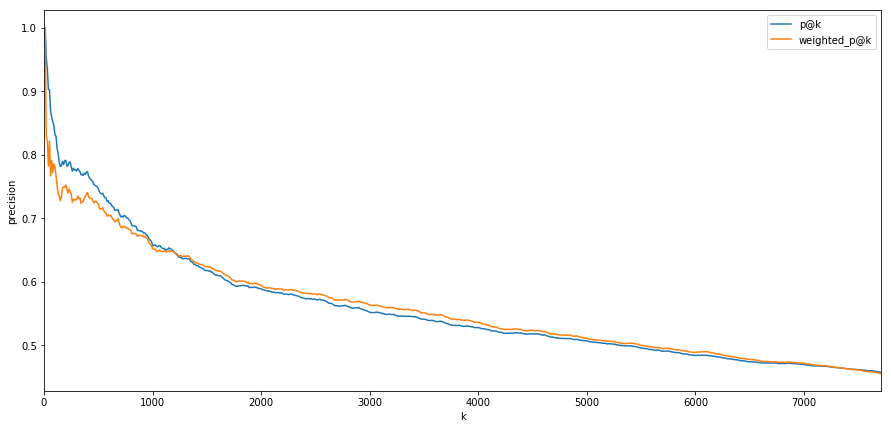

In [24]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_ylabel('precision')
_ = df_results[['k', 'p@k', 'weighted_p@k']].plot(x='k', ax=ax)

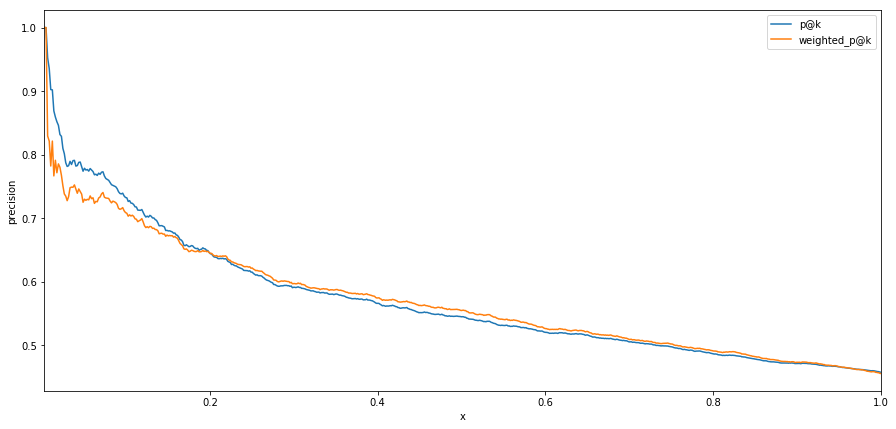

In [25]:
df_results['x'] = df_results['weighted_p@k'].cumsum()/ df_results['weighted_p@k'].sum()
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel('k')
ax.set_ylabel('precision')
_ = df_results[['x', 'p@k', 'weighted_p@k']].plot(x='x', ax=ax)

### Mulitply LDA-Gamma weights with the probabilities and plot new vs old p@k

In [28]:
def multiply_weights(df_probabilities, params):
    start_k = 1
    end_k = len(df_probabilities)
    k_inc = 10

    results = []
    
    df_copy = df_probabilities.copy()
    df_copy.sort_values(by='combined_predict_proba', ascending=False, inplace=True)
    
    df_probabilities['weight_rank'] = df_probabilities['latent_prob_delta_ratio'].rank()
    df_probabilities['weight_rank'] = df_probabilities['weight_rank']/ \
        df_probabilities['weight_rank'].max()

    # Avoid having the max normalized rank = 1 since the gamma ppf will return inf for that. 
    df_probabilities['weight_rank'] = df_probabilities['weight_rank'] - \
        df_probabilities['weight_rank'].min()
    
    df_probabilities['weight_rank'] = gamma.ppf(df_probabilities['weight_rank'], \
                                                a=params[0], loc=params[1], scale=params[2])
    
    
    df_probabilities['weight_prob_product'] = \
        df_probabilities['combined_predict_proba']*df_probabilities['weight_rank']
    
    df_probabilities.sort_values(by='weight_prob_product', ascending=False, inplace=True)

    for k in range(start_k, end_k, k_inc):
        v_pxw = df_probabilities[:k][df_probabilities['activity'] == 1.0]
        v = df_copy[:k][(df_copy['activity'] == 1.0)]
        p_at_k = v['activity'].sum()/k
        pxw_at_k = v_pxw['activity'].sum()/k
        
        result = [k, p_at_k, pxw_at_k]
        results.append(result)
        
    df_results = pd.DataFrame(results, columns=['k', 'p@k', 'pxw_at_k'])
    del df_copy
    return df_results

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


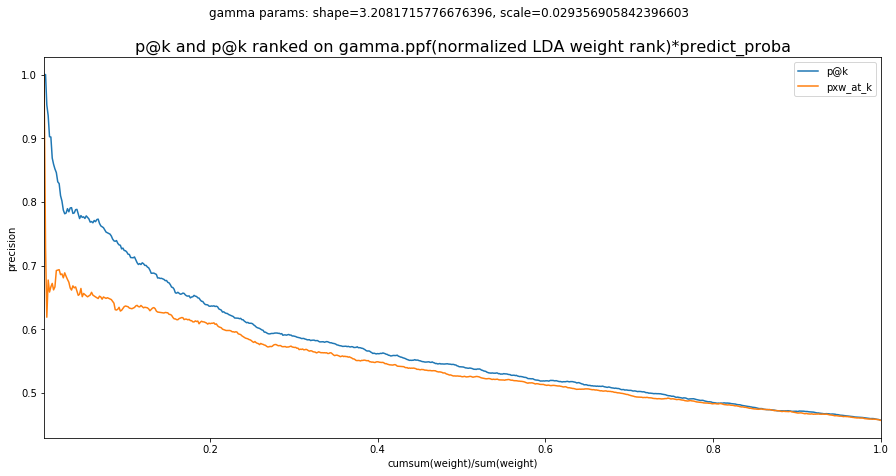

In [32]:
params = (3.2081715776676396, 0.0, 0.029356905842396603)
#params = (4.5, 0.0, 0.05)
df_results = multiply_weights(df_validation, params)

df_results['x'] = df_results['pxw_at_k'].cumsum()/ df_results['pxw_at_k'].sum()
fig, ax = plt.subplots(figsize=(15,7))

plt.suptitle('gamma params: shape={}, scale={}'.format(params[0], params[2]),fontsize=12)
ax.set_title('p@k and p@k ranked on gamma.ppf(normalized LDA weight rank)*predict_proba',fontsize=16)


ax.set_ylabel('precision')
_ = df_results[['x', 'p@k', 'pxw_at_k']].plot(x='x', ax=ax)

_ = ax.set_xlabel('cumsum(weight)/sum(weight)')